In [119]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [51]:
song_data = pd.read_csv("../Data/Most_Streamed_Spotify_Songs_2024.csv", encoding = 'unicode_escape')
song_data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.40,"390,470,936","30,716","196,631,588",...,684,62.00,"17,598,718",114.00,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.90,"323,703,884","28,113","174,597,137",...,3,67.00,"10,422,430",111.00,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.40,"601,309,283","54,331","211,607,669",...,536,136.00,"36,321,847",172.00,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.90,"2,031,280,633","269,802","136,569,078",...,"2,182",264.00,"24,684,248",210.00,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.30,"107,034,922","7,223","151,469,874",...,1,82.00,"17,660,624",105.00,"4,493,884","7,006","207,179","457,017",NaN,1


In [52]:
#Split dates in Release Date Column 
#Split Month to Month Column 
#Split Year Column 

#Converting Release Date Column to DateTime Format 
song_data['Release Date']=pd.to_datetime(song_data['Release Date'])
song_data.dtypes

#Extracting Month and Year
song_data['Month']= song_data['Release Date'].dt.month
song_data['Year']= song_data['Release Date'].dt.year
song_data.head(3)


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Month,Year
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.40,"390,470,936","30,716","196,631,588",...,"17,598,718",114.00,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,4,2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.90,"323,703,884","28,113","174,597,137",...,"10,422,430",111.00,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,5,2024
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.40,"601,309,283","54,331","211,607,669",...,"36,321,847",172.00,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,3,2024


In [53]:
#Create bins for seasons and update Df with Season Name 

bins= [0,3,6,9,12]
season_names = ["Winter","Spring","Summmer","Fall"]
song_data["Seasons"]= pd.cut(song_data["Month"],bins,labels=season_names, include_lowest=True)
song_data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Month,Year,Seasons
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.40,"390,470,936","30,716","196,631,588",...,114.00,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,4,2024,Spring
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.90,"323,703,884","28,113","174,597,137",...,111.00,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,5,2024,Spring
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.40,"601,309,283","54,331","211,607,669",...,172.00,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,3,2024,Winter
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.90,"2,031,280,633","269,802","136,569,078",...,210.00,"190,260,277","203,384",NaN,"11,822,942",NaN,0,1,2023,Winter
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.30,"107,034,922","7,223","151,469,874",...,105.00,"4,493,884","7,006","207,179","457,017",NaN,1,5,2024,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,"4,585",19.40,"305,049,963","65,770","5,103,054",...,NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1,9,2017,Summmer
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,"4,575",19.40,"52,282,360","4,602","1,449,767",...,NaN,NaN,NaN,NaN,"193,590",NaN,0,7,2018,Summmer
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,"4,571",19.40,"189,972,685","72,066","6,704,802",...,6.00,"84,426,740","28,999",NaN,"1,135,998",NaN,1,2,2020,Winter
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,"4,591",19.40,"145,467,020","14,037","7,387,064",...,7.00,"6,817,840",NaN,NaN,"448,292",NaN,0,11,2016,Fall


In [54]:
song_data.dtypes

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                         object
Track Score                          float64
Spotify Streams                       object
Spotify Playlist Count                object
Spotify Playlist Reach                object
Spotify Popularity                   float64
YouTube Views                         object
YouTube Likes                         object
TikTok Posts                          object
TikTok Likes                          object
TikTok Views                          object
YouTube Playlist Reach                object
Apple Music Playlist Count           float64
AirPlay Spins                         object
SiriusXM Spins                        object
Deezer Playlist Count                float64
Deezer Playlist Reach                 object
Amazon Pla

In [90]:
#Convert columns to string, replace commas 
columns_to_convert = ['Spotify Streams', 'All Time Rank', 'Spotify Playlist Count','YouTube Views', 'YouTube Likes', 'TikTok Likes', 'Spotify Playlist Reach','Deezer Playlist Reach',
                      'Amazon Playlist Count', 'TikTok Views','Pandora Track Stations', 'Pandora Streams','Soundcloud Streams','Shazam Counts']
for column in columns_to_convert:
    song_data[column] = song_data[column].astype(str).str.replace(',', '').astype(float)

# Set pandas display options to expand numbers instead of using scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

song_data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Month,Year,Seasons
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1.00,725.40,390470936.00,30716.00,196631588.00,...,114.00,18004655.00,22931.00,4818457.00,2669262.00,NaN,0,4,2024,Spring
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2.00,545.90,323703884.00,28113.00,174597137.00,...,111.00,7780028.00,28444.00,6623075.00,1118279.00,NaN,1,5,2024,Spring
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3.00,538.40,601309283.00,54331.00,211607669.00,...,172.00,5022621.00,5639.00,7208651.00,5285340.00,NaN,0,3,2024,Winter
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4.00,444.90,2031280633.00,269802.00,136569078.00,...,210.00,190260277.00,203384.00,NaN,11822942.00,NaN,0,1,2023,Winter
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5.00,423.30,107034922.00,7223.00,151469874.00,...,105.00,4493884.00,7006.00,207179.00,457017.00,NaN,1,5,2024,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585.00,19.40,305049963.00,65770.00,5103054.00,...,NaN,20104066.00,13184.00,50633006.00,656337.00,NaN,1,9,2017,Summmer
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575.00,19.40,52282360.00,4602.00,1449767.00,...,NaN,NaN,NaN,NaN,193590.00,NaN,0,7,2018,Summmer
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571.00,19.40,189972685.00,72066.00,6704802.00,...,6.00,84426740.00,28999.00,NaN,1135998.00,NaN,1,2,2020,Winter
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591.00,19.40,145467020.00,14037.00,7387064.00,...,7.00,6817840.00,NaN,NaN,448292.00,NaN,0,11,2016,Fall


In [91]:
#Reducing DataFrame to the columns needed 

reduced_songdata = song_data[
    ["Track", "Album Name","Artist","Release Date","All Time Rank",
     "Spotify Streams","Spotify Popularity","YouTube Views","YouTube Likes",
     "TikTok Posts","TikTok Views","TikTok Likes","TikTok Views","AirPlay Spins","Pandora Streams",
     "Soundcloud Streams", "Explicit Track","Month","Year","Seasons","Spotify Playlist Count"]]

reduced_songdata

,Track,Album Name,Artist,Release Date,All Time Rank,Spotify Streams,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,...,TikTok Likes,TikTok Views,AirPlay Spins,Pandora Streams,Soundcloud Streams,Explicit Track,Month,Year,Seasons,Spotify Playlist Count
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1.00,390470936.00,92.00,84274754.00,1713126.00,"5,767,700",...,651565900.00,5332281936.00,"40,975",18004655.00,4818457.00,0,4,2024,Spring,30716.00
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2.00,323703884.00,92.00,116347040.00,3486739.00,"674,700",...,35223547.00,208339025.00,"40,778",7780028.00,6623075.00,1,5,2024,Spring,28113.00
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,3.00,601309283.00,92.00,122599116.00,2228730.00,"3,025,400",...,275154237.00,3369120610.00,"74,333",5022621.00,7208651.00,0,3,2024,Winter,54331.00
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,4.00,2031280633.00,85.00,1096100899.00,10629796.00,"7,189,811",...,1078757968.00,14603725994.00,"1,474,799",190260277.00,NaN,0,1,2023,Winter,269802.00
4,Houdini,Houdini,Eminem,2024-05-31,5.00,107034922.00,88.00,77373957.00,3670188.00,"16,400",...,NaN,NaN,"12,185",4493884.00,207179.00,1,5,2024,Spring,7223.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,4585.00,305049963.00,71.00,149247747.00,1397590.00,"48,370",...,20202000.00,143934379.00,6,20104066.00,50633006.00,1,9,2017,Summmer,65770.00
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,4575.00,52282360.00,56.00,943920245.00,5347766.00,NaN,...,1721.00,19935.00,412,NaN,NaN,0,7,2018,Summmer,4602.00
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,4571.00,189972685.00,65.00,201027333.00,1081402.00,"7,596",...,5288677.00,36849005.00,204,84426740.00,NaN,1,2,2020,Winter,72066.00
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,4591.00,145467020.00,66.00,1118595159.00,3868828.00,"11,433",...,2534831.00,37757301.00,"1,200",6817840.00,NaN,0,11,2016,Fall,14037.00


In [92]:
# Calculate averages by month, season, and year

monthly_stats = reduced_songdata.groupby('Month')['Spotify Streams'].mean()
seasonal_stats = reduced_songdata.groupby('Seasons')['Spotify Streams'].mean()
yearly_stats = reduced_songdata.groupby('Year')['Spotify Streams'].mean()

average_spotify_stats = pd.DataFrame({
    "Monthly Average":monthly_stats ,
    "Seasonal Average": seasonal_stats , 
    "Yearly Average": yearly_stats
})

monthly_stats

/var/folders/14/kd5dvlbj2t7dp4cyd4zx18hh0000gn/T/ipykernel_46167/1936505306.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_stats = reduced_songdata.groupby('Seasons')['Spotify Streams'].mean()


Month
1    737811705.79
2    372504221.28
3    392815676.32
4    353344447.75
5    354440741.39
6    395811356.17
7    483547155.49
8    460266424.55
9    422175366.98
10   443678177.58
11   510180646.87
12   385848427.02
Name: Spotify Streams, dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4600,) and arg 1 with shape (12,).

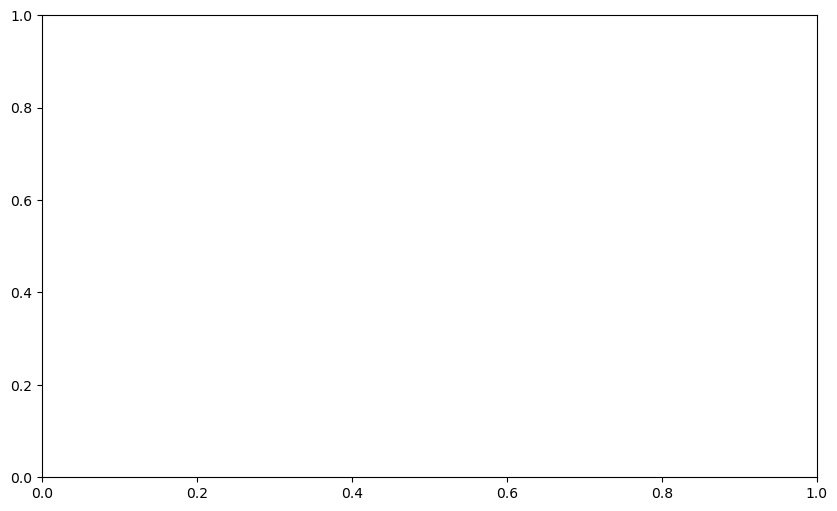

In [93]:
# Monthly Average Spotify Streams

plt.figure(figsize=(10, 6))
x_axis = reduced_songdata["Month"]
plt.bar(x_axis, monthly_stats, color="b")
plt.title('Average Spotify Streams by Month')
plt.xlabel('Month')
plt.ylabel('Average Streams')
plt.grid(True)
plt.show()

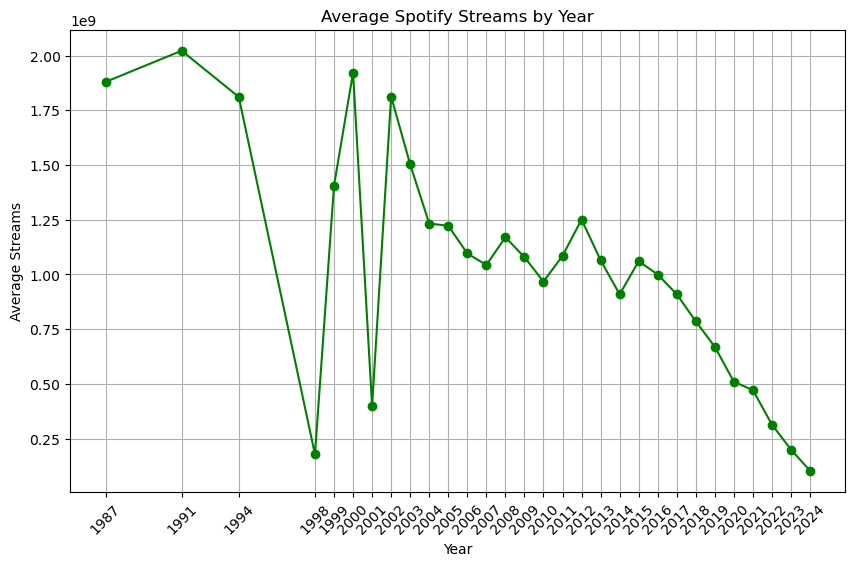

In [59]:
# Yearly Average Spotify Streams
yearly_avg = song_data.groupby('Year')['Spotify Streams'].mean()
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color='green')
plt.title('Average Spotify Streams by Year')
plt.xlabel('Year')
plt.ylabel('Average Streams')
plt.grid(True)
plt.xticks(yearly_avg.index, rotation=45) 
plt.show()

/var/folders/14/kd5dvlbj2t7dp4cyd4zx18hh0000gn/T/ipykernel_46167/4284801113.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_avg = song_data.groupby('Seasons')['Track Score'].mean().sort_values()


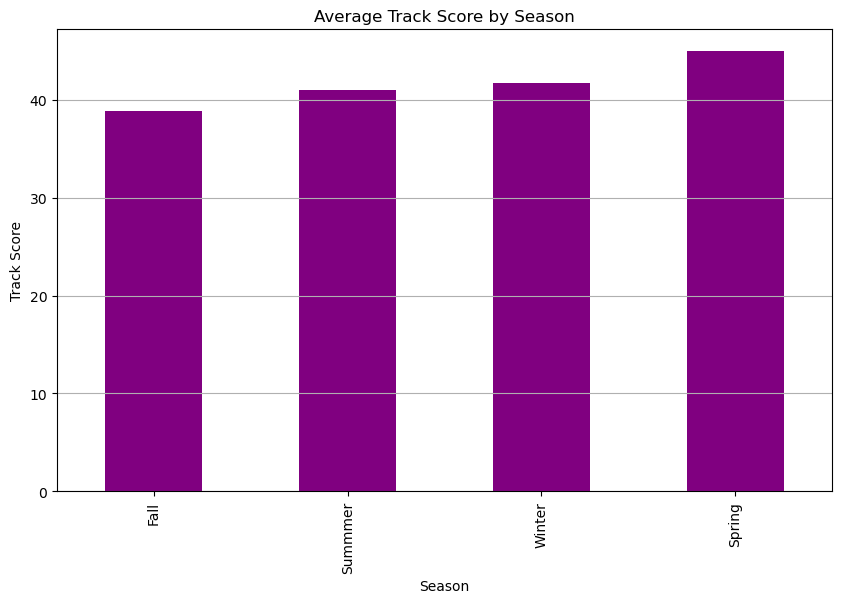

In [60]:
# Bar Graph for Seasonal Differences in Track Scores

seasonal_avg = song_data.groupby('Seasons')['Track Score'].mean().sort_values()
plt.figure(figsize=(10, 6))
seasonal_avg.plot(kind='bar', color='purple')
plt.title('Average Track Score by Season')
plt.xlabel('Season')
plt.ylabel('Track Score')
plt.grid(True, axis='y')
plt.show()

In [ ]:
print(song_data.columns.values)

# Which tracks achieved the most success across all platforms, and what factors contribute to their cross-platform success?

In [95]:
duplicate_columns = reduced_songdata.columns[reduced_songdata.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)

Duplicate columns: Index(['TikTok Views'], dtype='object')


In [96]:
reduced_songdata = reduced_songdata.loc[:, ~reduced_songdata.columns.duplicated()] 

In [98]:
# Calculate Composite Score
#Summing the values across these columns
reduced_songdata['Composite Score'] = (
    reduced_songdata['Spotify Streams'] +
    reduced_songdata['YouTube Views'] +
    reduced_songdata['TikTok Views'] +
    reduced_songdata['Soundcloud Streams']
)

In [99]:
top_tracks = reduced_songdata.nlargest(10, 'Composite Score')

In [100]:
# Create a Table for Composite Scores
# Select relevant columns for display
composite_score_table = reduced_songdata[['Track', 'Artist', 'Composite Score', 'Spotify Streams', 'YouTube Views', 'TikTok Views']]

# Sort by composite score to display top tracks
composite_score_table = composite_score_table.sort_values(by='Composite Score', ascending=False).reset_index(drop=True)

In [101]:
# Display the top tracks based on their composite score
print("Table of Composite Scores for Top Tracks:")
print(composite_score_table.head(10))

Table of Composite Scores for Top Tracks:
                             Track           Artist  Composite Score  \
0        STAY (with Justin Bieber)    The Kid LAROI   28112792545.00   
1                          Sunroof      Nicky Youre   23047587289.00   
2   Get You The Moon (feat. Snï¿½ï             Kina   22871027638.00   
3                        Calm Down             Rema   19957656987.00   
4  All I Want for Christmas Is You     Mariah Carey   18599552180.00   
5                     Shape of You       Ed Sheeran   14322461659.00   
6                         Believer  Imagine Dragons   13380689084.00   
7                 A Thousand Years  Christina Perri   13238657834.00   
8                             Home   Edith Whiskers   13112111602.00   
9                     Dance Monkey      Tones And I   12337031733.00   

   Spotify Streams  YouTube Views   TikTok Views  
0    3107100349.00  1256973582.00 23712377029.00  
1     879708559.00    74610328.00 22086963233.00  
2    1020435

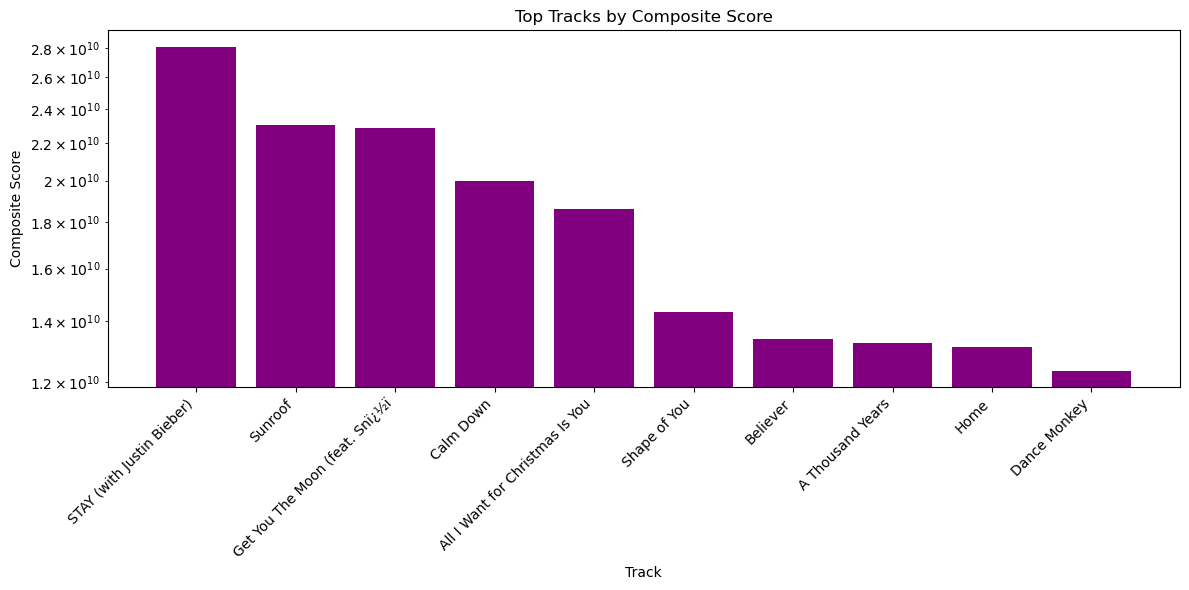

In [102]:
#Visualization 
#Bar Chart for the top tracks by composite score 

plt.figure(figsize=(12,6))
plt.bar(top_tracks["Track"], top_tracks["Composite Score"], color="purple")
plt.title('Top Tracks by Composite Score')
plt.xlabel('Track')
plt.ylabel('Composite Score')
plt.xticks(rotation=45, ha='right') 
plt.yscale('log') 
plt.tight_layout()
plt.show()


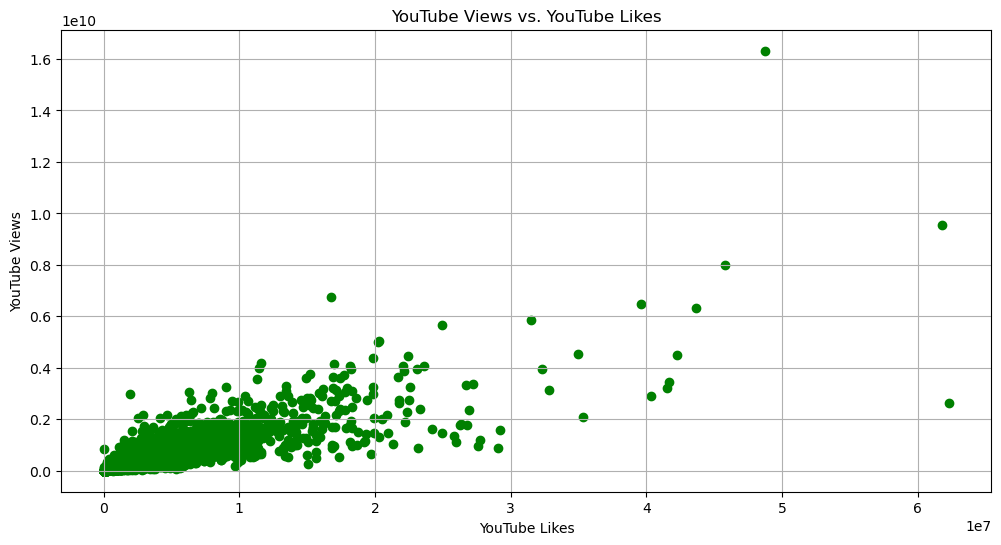

In [107]:
# We can also plot relationships with other variables like YouTube Views and TikTok Likes
plt.figure(figsize=(12, 6))
plt.scatter(reduced_songdata['YouTube Likes'], reduced_songdata['YouTube Views'], color='green')
plt.title('YouTube Views vs. YouTube Likes')
plt.xlabel('YouTube Likes')
plt.ylabel('YouTube Views')
plt.grid(True)
plt.show()

In [86]:
# Check if TikTok Likes is numeric and convert if necessary
if not pd.api.types.is_numeric_dtype(reduced_songdata['TikTok Likes']):
    # Assume that non-numeric data might be due to presence of commas in numbers
    reduced_songdata['TikTok Likes'] = reduced_songdata['TikTok Likes'].str.replace(',', '').astype(float)

# Fill any remaining missing or NaN values with 0 (after conversion attempt)
reduced_songdata['TikTok Likes'] = reduced_songdata['TikTok Likes'].fillna(0)

# Verify the conversion
print(reduced_songdata['TikTok Likes'].head())

0    651565900.00
1     35223547.00
2    275154237.00
3   1078757968.00
4            0.00
Name: TikTok Likes, dtype: float64


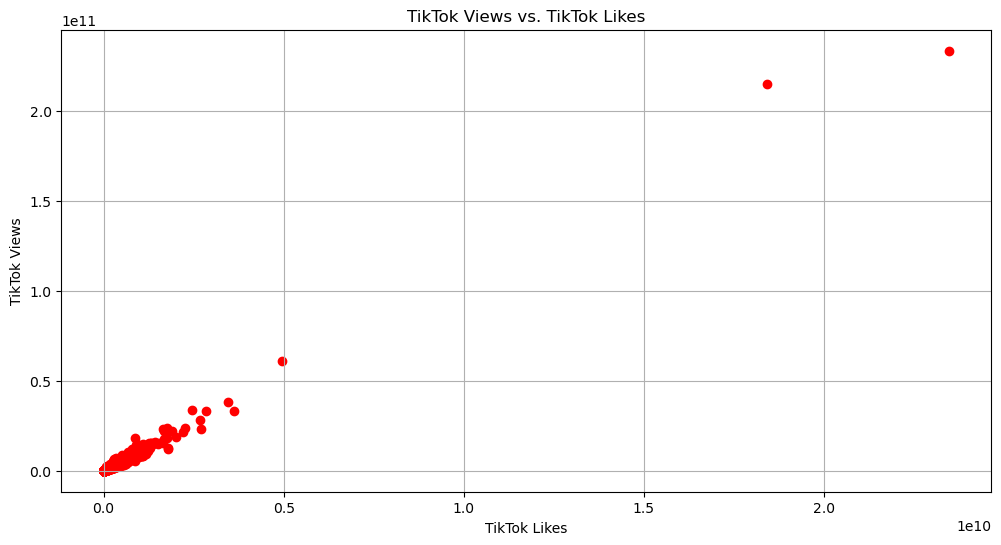

In [108]:
# Plotting TikTok Likes against Composite Score
plt.figure(figsize=(12, 6))
plt.scatter(reduced_songdata['TikTok Likes'], reduced_songdata['TikTok Views'], color='red')
plt.title('TikTok Views vs. TikTok Likes')
plt.xlabel('TikTok Likes')
plt.ylabel('TikTok Views')
plt.grid(True)
plt.show()

In [123]:
#Run a linear regression between TikTok Likes and TikTok Views 

def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, marker="o", edgecolor="black", linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

The r-value is: nan


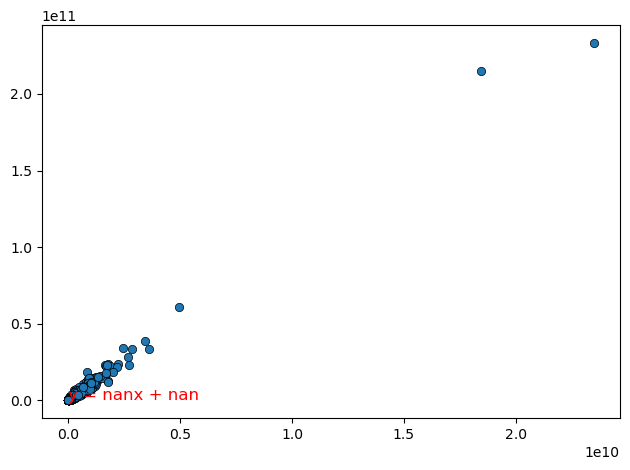

In [124]:
linregress_plot(reduced_songdata["TikTok Likes"],reduced_songdata["TikTok Views"])